In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['images']


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Done.


In [4]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

In [5]:
path = "../input/images/Images"
path

'../input/images/Images'

In [6]:
np.random.seed(42)
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=32)

/opt/conda/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


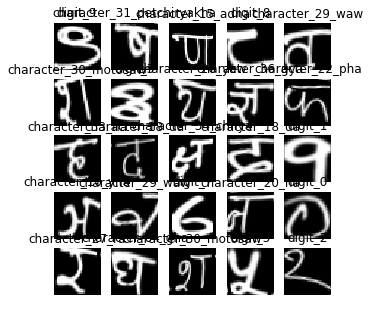

In [7]:
data.show_batch(row=3, figsize=(5,5))

In [8]:
print(data.classes)

['character_01_ka', 'character_02_kha', 'character_03_ga', 'character_04_gha', 'character_05_kna', 'character_06_cha', 'character_07_chha', 'character_08_ja', 'character_09_jha', 'character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


In [9]:
len(data.classes)

46

In [10]:
cache_dir = os.path.expanduser(os.path.join('~','.torch'))
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

In [11]:
models_dir = os.path.join(cache_dir,'models')
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [12]:
!cp ../input/resnet50/resnet50.pth ~/.torch/models/resnet50-333f7ec4.pth

cp: cannot stat '../input/resnet50/resnet50.pth': No such file or directory


In [13]:
MODEL_PATH = '/tmp/models'
learn = cnn_learner(data, models.resnet50, metrics=accuracy, model_dir=MODEL_PATH)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:08, 12765319.66it/s]


In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.620826,1.146181,0.666413,03:12
1,0.651347,0.368364,0.888424,02:14
2,0.403230,0.202096,0.938478,02:11


In [15]:
interp = ClassificationInterpretation.from_learner(learn)

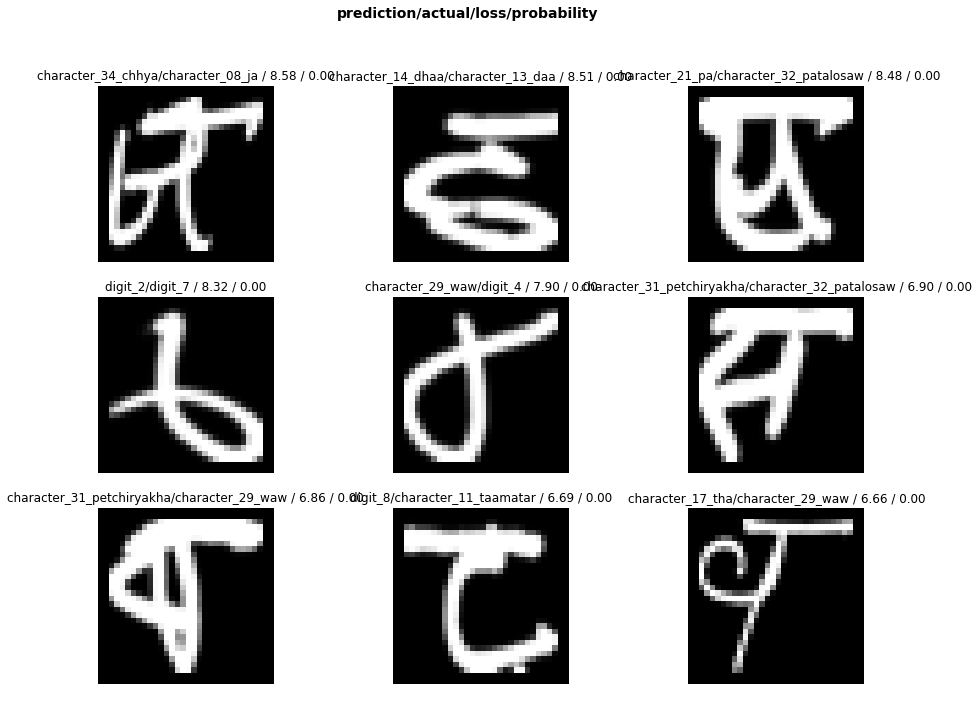

In [16]:
interp.plot_top_losses(9, figsize=(15,11))

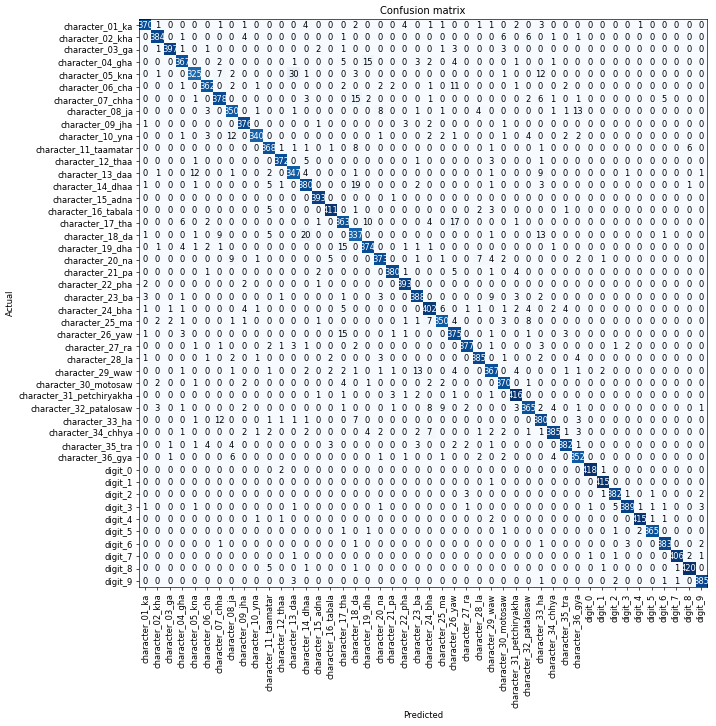

In [17]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [18]:
interp.most_confused(min_val=2)

[('character_05_kna', 'character_13_daa', 30),
 ('character_18_da', 'character_14_dhaa', 20),
 ('character_14_dhaa', 'character_18_da', 19),
 ('character_17_tha', 'character_26_yaw', 17),
 ('character_04_gha', 'character_19_dha', 15),
 ('character_07_chha', 'character_18_da', 15),
 ('character_19_dha', 'character_17_tha', 15),
 ('character_26_yaw', 'character_17_tha', 15),
 ('character_08_ja', 'character_36_gya', 13),
 ('character_18_da', 'character_33_ha', 13),
 ('character_29_waw', 'character_23_ba', 13),
 ('character_05_kna', 'character_33_ha', 12),
 ('character_10_yna', 'character_08_ja', 12),
 ('character_13_daa', 'character_05_kna', 12),
 ('character_33_ha', 'character_07_chha', 12),
 ('character_06_cha', 'character_26_yaw', 11),
 ('character_17_tha', 'character_19_dha', 10),
 ('character_13_daa', 'character_33_ha', 9),
 ('character_18_da', 'character_07_chha', 9),
 ('character_20_na', 'character_08_ja', 9),
 ('character_23_ba', 'character_29_waw', 9),
 ('character_32_patalosaw',

In [19]:
learn.save('stage-1')
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


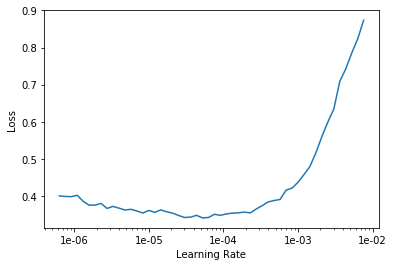

In [20]:
learn.lr_find()
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.304404,0.138584,0.955652,02:16
1,0.205032,0.089496,0.971033,02:17
2,0.176914,0.071012,0.976902,02:15


In [22]:
learn.save('stage-2')

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

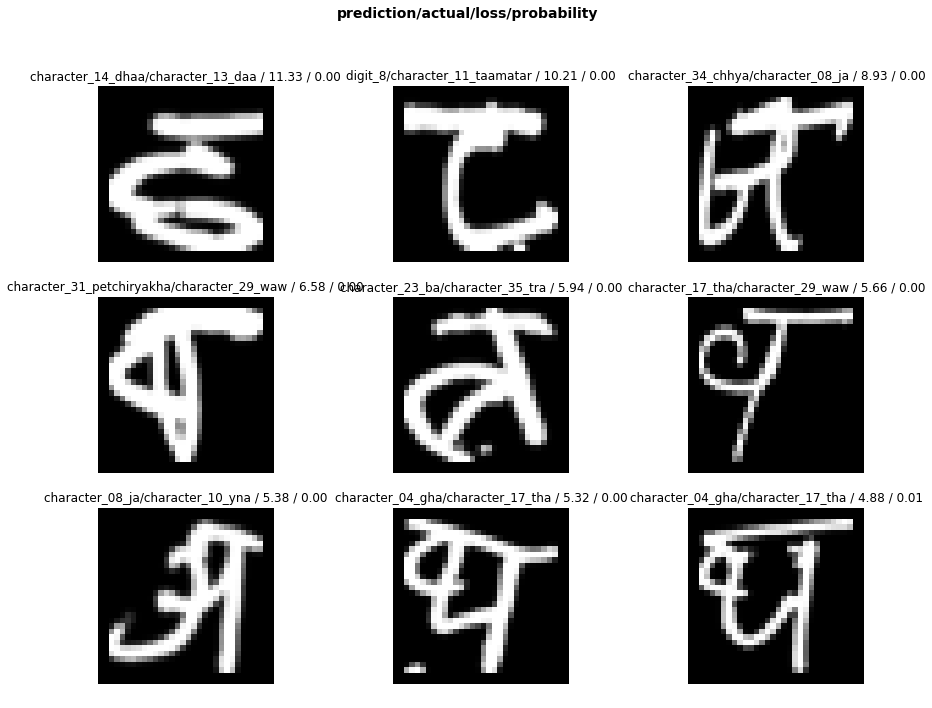

In [24]:
interp.plot_top_losses(9 , figsize=(15,11))

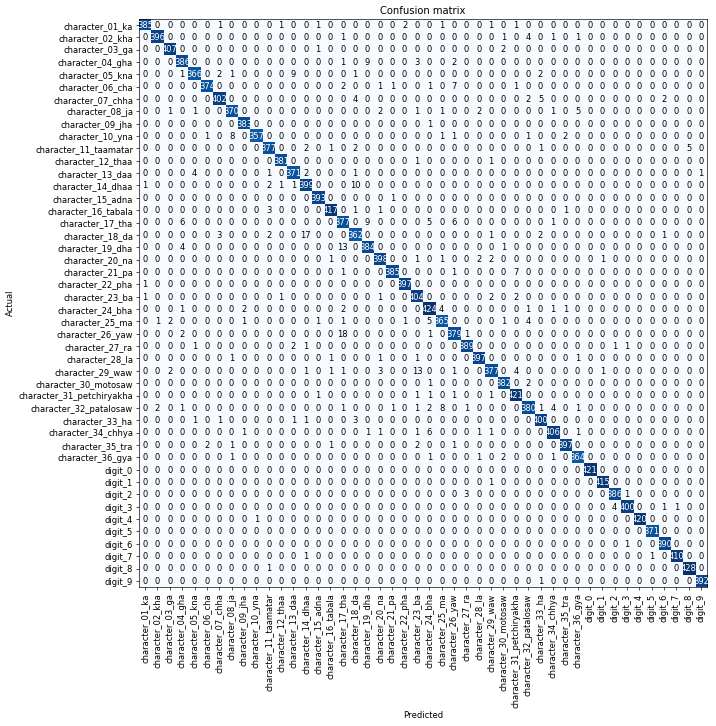

In [25]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [26]:
interp.most_confused(min_val=2)

[('character_26_yaw', 'character_17_tha', 18),
 ('character_18_da', 'character_14_dhaa', 17),
 ('character_19_dha', 'character_17_tha', 13),
 ('character_29_waw', 'character_23_ba', 13),
 ('character_14_dhaa', 'character_18_da', 10),
 ('character_04_gha', 'character_19_dha', 9),
 ('character_05_kna', 'character_13_daa', 9),
 ('character_17_tha', 'character_19_dha', 9),
 ('character_10_yna', 'character_08_ja', 8),
 ('character_32_patalosaw', 'character_25_ma', 8),
 ('character_06_cha', 'character_26_yaw', 7),
 ('character_21_pa', 'character_31_petchiryakha', 7),
 ('character_17_tha', 'character_04_gha', 6),
 ('character_17_tha', 'character_26_yaw', 6),
 ('character_34_chhya', 'character_24_bha', 6),
 ('character_07_chha', 'character_33_ha', 5),
 ('character_08_ja', 'character_36_gya', 5),
 ('character_11_taamatar', 'digit_8', 5),
 ('character_17_tha', 'character_24_bha', 5),
 ('character_25_ma', 'character_24_bha', 5),
 ('character_02_kha', 'character_32_patalosaw', 4),
 ('character_07_